### Sistematično iskanje grafov z maksimalno sigma čisto nepravilnostjo na majhnih grafih

In [1]:
#knjižnice
import networkx as nx
from itertools import combinations, product
import matplotlib.pyplot as plt
import numpy as np

### Preko generiranja grafov

In [2]:
def generating_graphs(n): # n število vozlišč
    nodes = list(range(n))
    triangle_free_graphs = [] # seznam primernih grafov

    def is_triangle_free(G): # funkcija za preverjanje trikotnikov
        return all(count == 0 for count in nx.triangles(G).values())

    # število povezav
    for i in range(len(list(combinations(nodes, 2)))):
        
        # kombinacije na povezav glede na število povezav
        for edges in combinations(combinations(nodes, 2), i):
            
            unique = True # True, če takega še nimamo
            G = nx.Graph() # ustvarimo graf
            G.add_nodes_from(nodes) # dodamo mu vozlišča
            G.add_edges_from(edges) # dodamo mu povezave
            
            if not(is_triangle_free(G)): # če je trikoten
                continue

            for graph in triangle_free_graphs: # preverjamo, če že imamo isomorfen graf
                if nx.is_isomorphic(G, graph):
                    unique = False
                    break
            
            if unique == False: # če tak graf že imamo
                continue

            triangle_free_graphs.append(G)
            
    return triangle_free_graphs # vrnemo grafe brez triciklov

# računanje sigma nepravilnosti z uporabo degree()
def sigma_irregularity_via_degree(G):
    return sum((G.degree[u] - G.degree[v]) ** 2 for u, v in combinations(G.nodes, 2))

# računanje sigma nepravilnosti preko matrike sosednosti - ni uporabljeno v nadaljevanju
def sigma_irregularity_via_adj_matrix(G):
    adj_matrix = nx.adjacency_matrix(G).toarray()
    return sum((u - v) ** 2 for u, v in combinations(np.sum(adj_matrix, axis = 1),2))

In [ ]:
# prikaz grafov
def draw_graphs(graph_list):

    num_graphs = len(graph_list) 
    cols = 3  # Število grafov v stolpcu
    rows = (num_graphs + cols - 1) // cols  # Računanje pravega števila vrstic

    # Ustvarjanje figure
    plt.figure(figsize=(cols * 4, rows * 4)) 

    # Risanje grafov
    for i, G in enumerate(graph_list):
        plt.subplot(rows, cols, i + 1)
        nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
        sigma = sigma_irregularity_via_degree(G) # dodamo sigma irregularity
        plt.title(f"Graph {i + 1}, Sigma {sigma}")

    plt.tight_layout()
    plt.show()

In [9]:
# vrne max sigma nepravilnost za grafe do n vozlisc, če je parameter show=True, grafe tudi nariše
def max_sigma_irregularities(n, show=False):

    for i in range(1, n + 1):

        max_sigma = 0
        graphs_with_max_sigma = []
        graphs = generating_graphs(i)

        for G in graphs:
            sigma = sigma_irregularity_via_degree(G)

            if sigma > max_sigma: # nova maks sigma
                graphs_with_max_sigma = [G]
                max_sigma = sigma
            
            elif sigma == max_sigma:
                graphs_with_max_sigma.append(G)
        
        print(f"Grafi reda {i}, max_sigma = {max_sigma}, število grafov = {len(graphs_with_max_sigma)}")
        if show == True:

            draw_graphs(graphs_with_max_sigma)


Grafi reda 1, max_sigma = 0, število grafov = 0


<Figure size 1200x0 with 0 Axes>

Grafi reda 2, max_sigma = 0, število grafov = 1


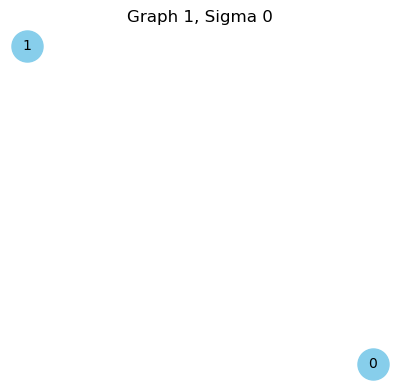

Grafi reda 3, max_sigma = 2, število grafov = 2


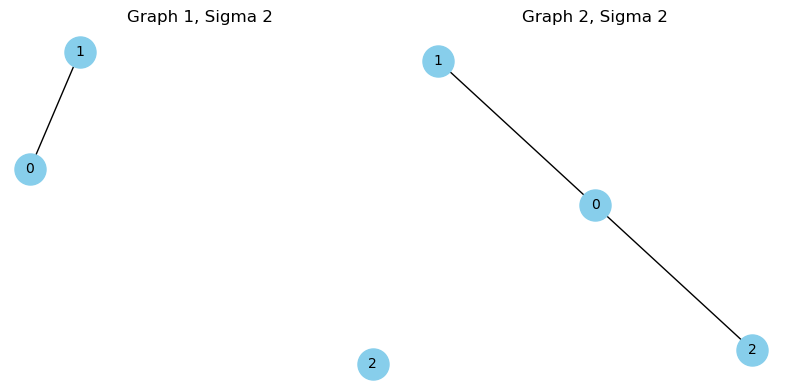

Grafi reda 4, max_sigma = 12, število grafov = 1


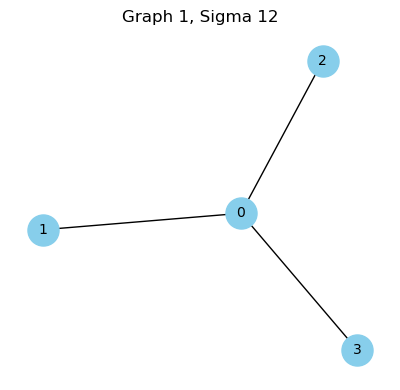

Grafi reda 5, max_sigma = 36, število grafov = 1


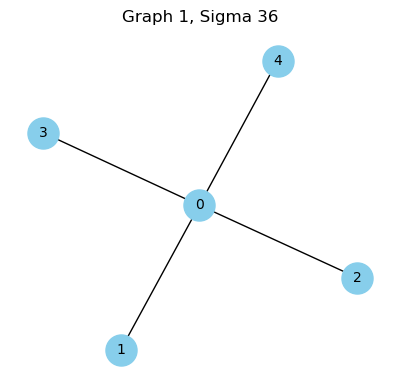

Grafi reda 6, max_sigma = 80, število grafov = 1


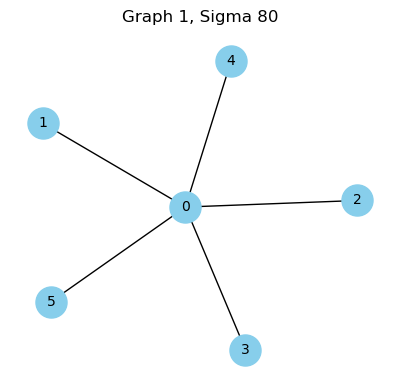

Grafi reda 7, max_sigma = 150, število grafov = 1


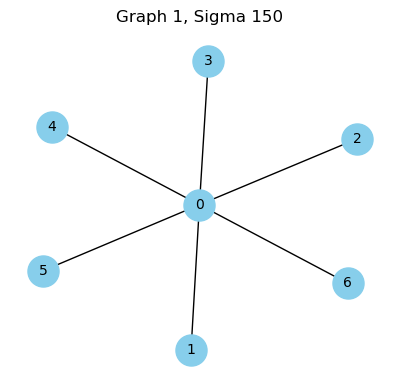

In [11]:
max_sigma_irregularities(7, True)

## Preko matrike sosednosti

Tu predpostavljamo, da je sled kuba incidenčne matrike 0, natanko tedaj ko graf nima ciklov dolžine 3

In [23]:
# z knjižnico numpy, n je število vozlišč, ne preverjamo izomorfizmov
def graph_generation_using_numpy(n):
    
    triangle_free = [] # seznam grafov brez 3-ciklov
    length_of_option = ((n-1) * n) / 2 # število spremeljivk
    indices = np.triu_indices(n, k=1) # elementi zgornje trikotne matrike brez diagonale
    
    # iščemo upper od matrike, ker vemo da je simetrična
    for option in product([0,1], repeat=int(length_of_option)):

        matrix = np.zeros((n, n)) # ustvari matriko
        matrix[indices] = option # postavi opcijo na prava mesta v matriki sosednosti
        matrix = matrix + matrix.T # dopolnimo matriko sosednosti

        # preveri če je trikotna
        if np.trace(np.linalg.matrix_power(matrix, 3)) == 0:
            triangle_free.append(matrix)
    
    return triangle_free 

# računanje sigma popolne nepravilnosti
def sigma_irr_numpy(G):
    return sum((u - v) ** 2 for u, v in combinations(np.sum(G, axis = 1),2))

Grafi reda 1, max_sigma = 0


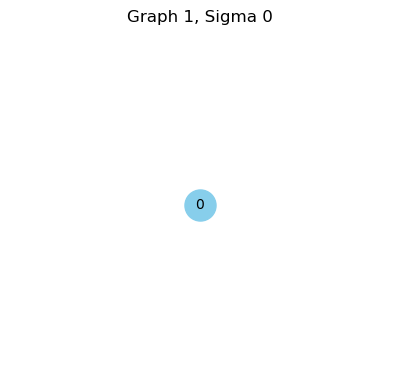

Grafi reda 2, max_sigma = 0


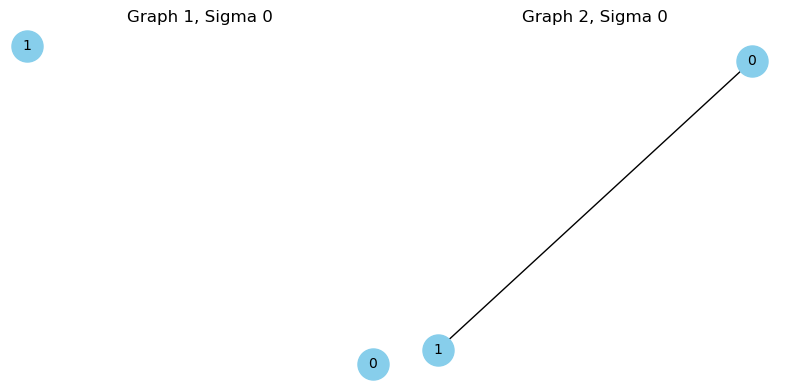

Grafi reda 3, max_sigma = 2.0


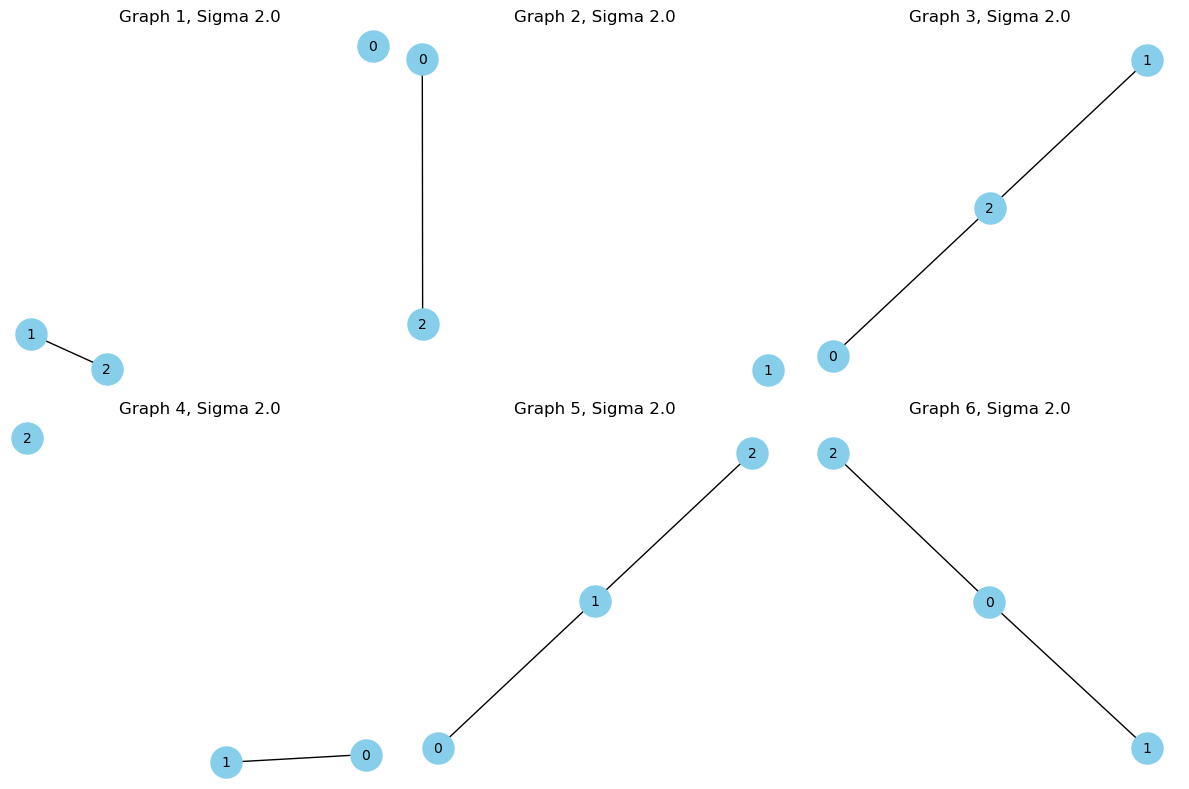

Grafi reda 4, max_sigma = 12.0


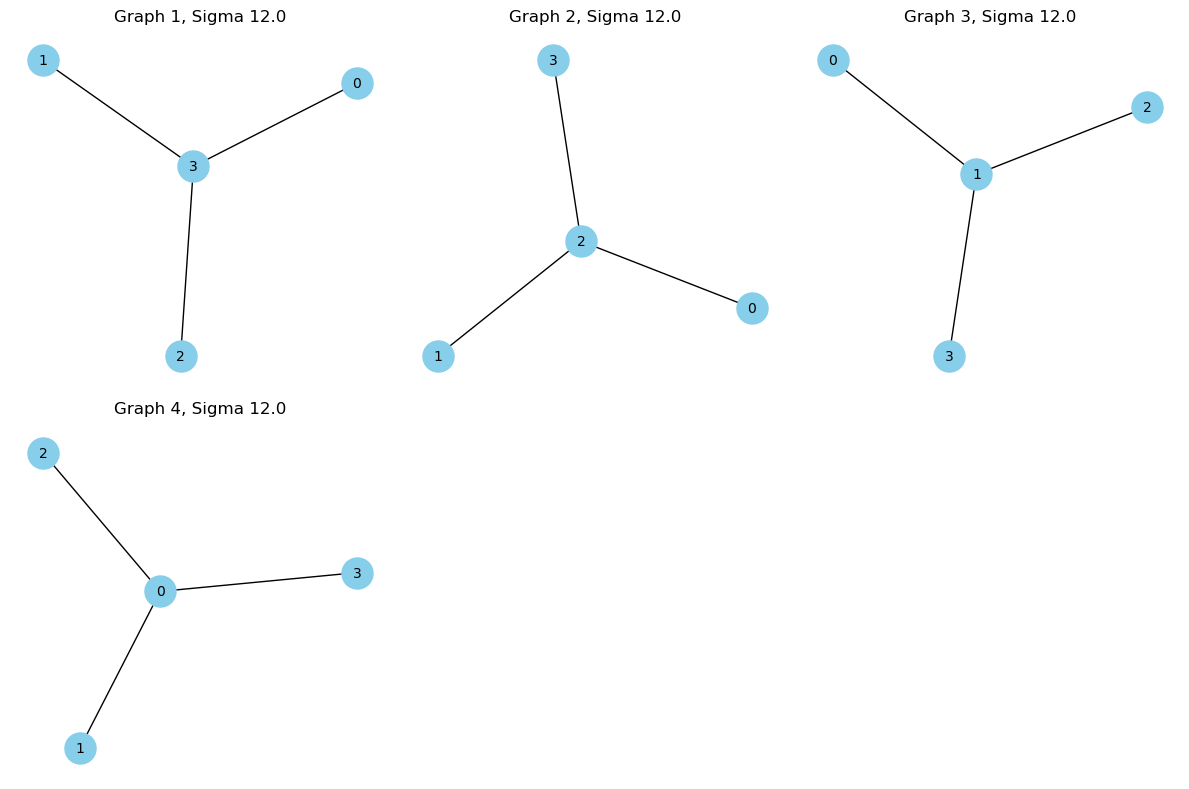

Grafi reda 5, max_sigma = 36.0


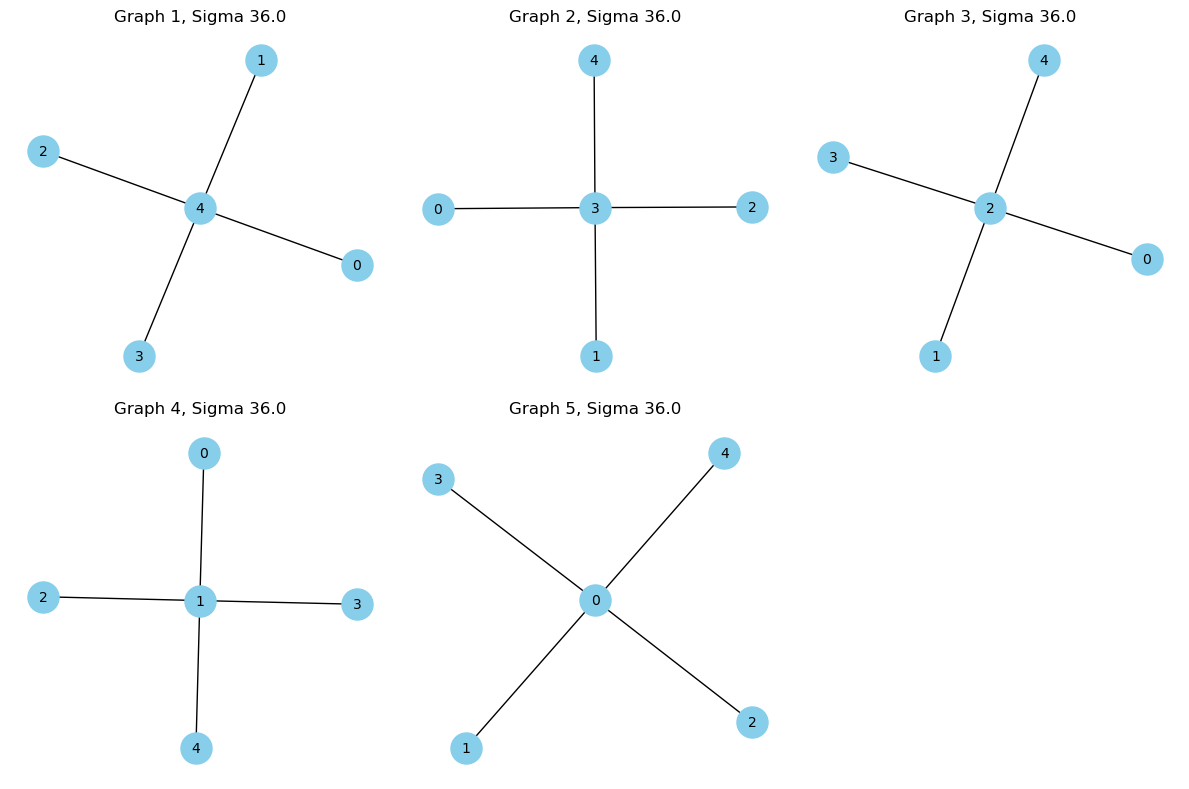

Grafi reda 6, max_sigma = 80.0


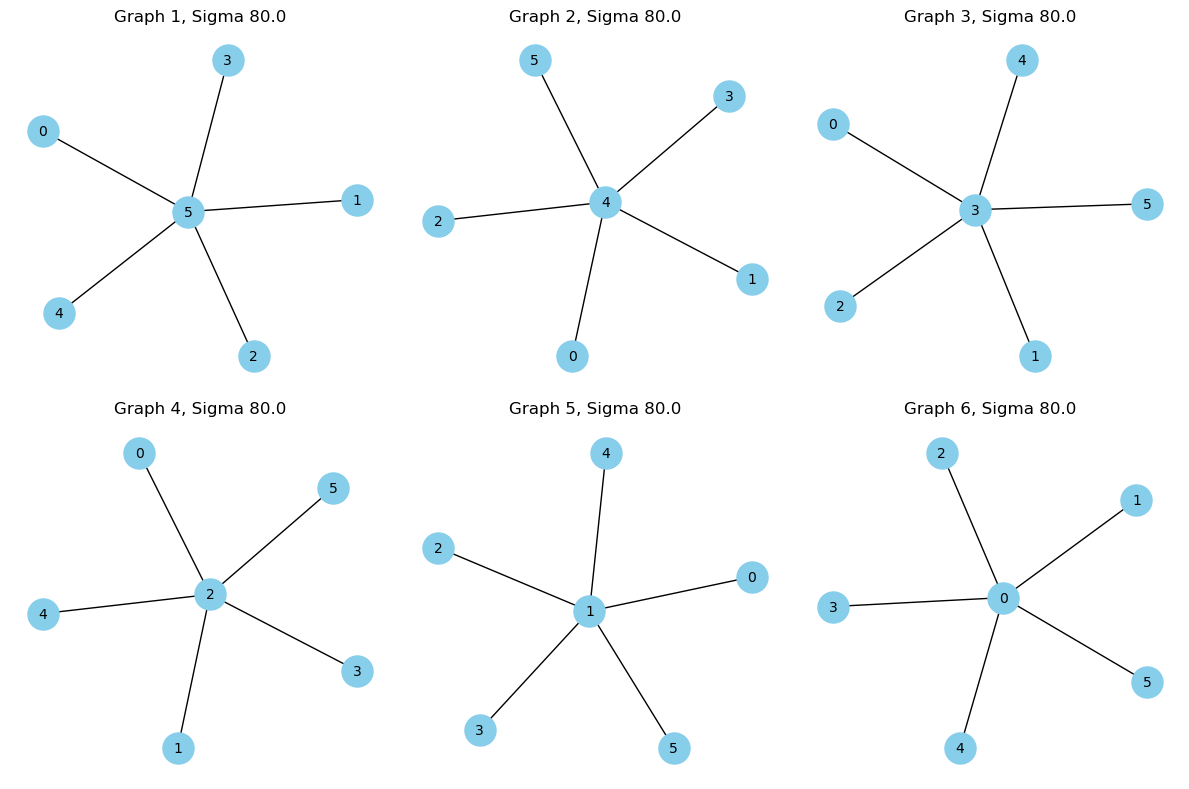

Grafi reda 7, max_sigma = 150.0


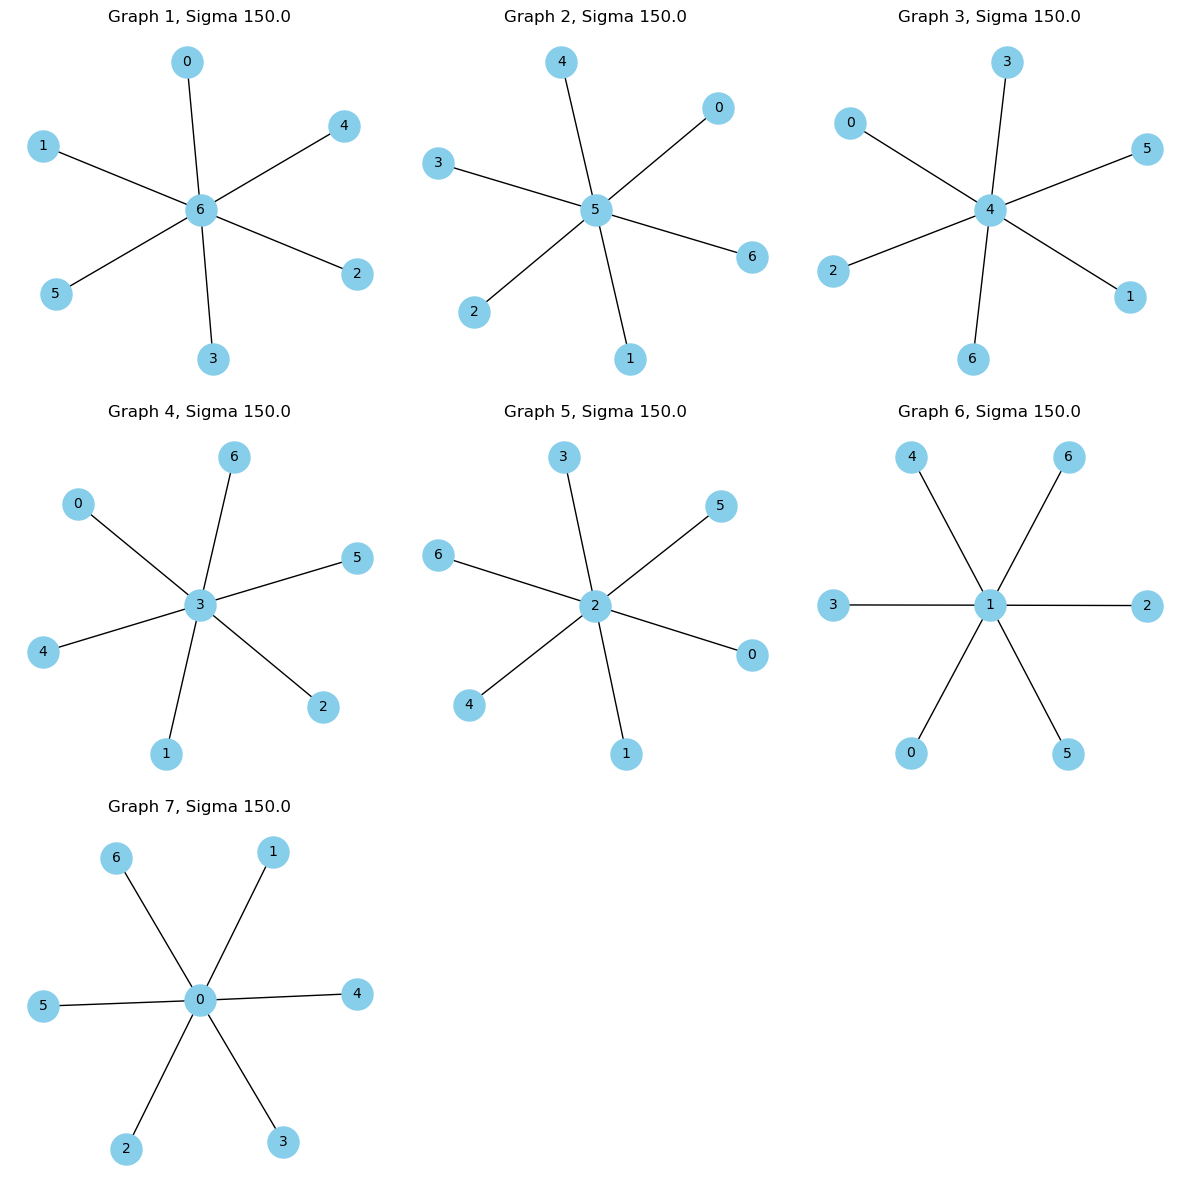

In [26]:
# pridobivamo max sigma irregularities grafov do n volisc
def max_sigma_irr_numpy(n, show=False):
    for i in range(1, n + 1):

        max_sigma = 0
        graphs_with_max_sigma = []
        graphs = graph_generation_using_numpy(i)

        for G in graphs:
            sigma = sigma_irr_numpy(G)

            if sigma > max_sigma: # nova maks sigma
                graphs_with_max_sigma = [G]
                max_sigma = sigma
            
            elif sigma == max_sigma:
                graphs_with_max_sigma.append(G)
        
        print(f"Grafi reda {i}, max_sigma = {max_sigma}")
        if show == True:

            num_graphs = len(graphs_with_max_sigma) 
            cols = 3  # Število grafov v stolpcu
            rows = (num_graphs + cols - 1) // cols  # Računanje pravega števila vrstic

            # Ustvarjanje figure
            plt.figure(figsize=(cols * 4, rows * 4)) 

            # Risanje grafov
            for i, G in enumerate(graphs_with_max_sigma):
                plt.subplot(rows, cols, i + 1)
                Graph = nx.from_numpy_array(G)
                nx.draw(Graph, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
                plt.title(f"Graph {i + 1}, Sigma {max_sigma}")

            plt.tight_layout()
            plt.show()
    
max_sigma_irr_numpy(7, True)